## Import Libraries

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import warnings
import numpy as np
warnings.filterwarnings('ignore')

## Import Titanic dataset

In [4]:
df = pd.read_csv('titanic.csv')

## Read head of the dataset

In [5]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exercise 1

Text(0.5, 0, 'Fare')

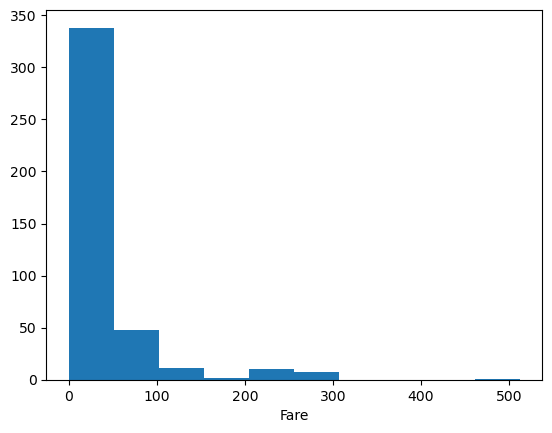

In [6]:
plt.hist(df['Fare'])
plt.xlabel('Fare')

## Exercise 2

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'PassengerId'),
  Text(1.5, 0, 'Pclass'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'SibSp'),
  Text(4.5, 0, 'Parch'),
  Text(5.5, 0, 'Fare')])

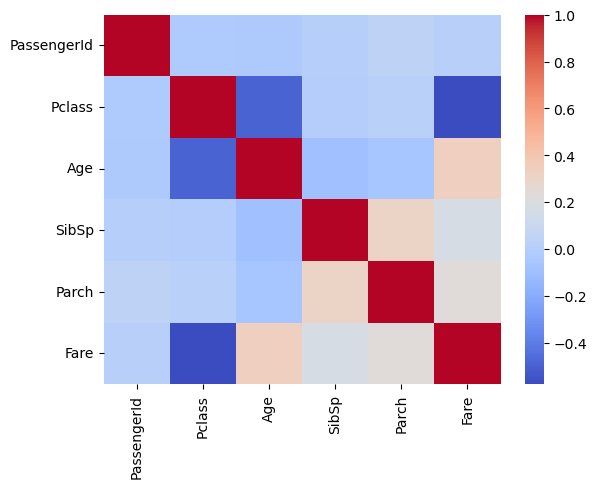

In [7]:
sns.heatmap(df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), cmap="coolwarm")
plt.xticks(rotation=90)

## Exercise 3


Find "Pearson correlation" and "Spearman correlation" between "Age" and "Parch" column?

In [8]:
age = df['Age'].fillna(df['Age'].mean())
parch = df['Parch'].fillna(df['Parch'].mean())

pearsonr_coefficient, p_value = pearsonr(age, parch)
print('PeasonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

spearmanr_coefficient, p_value = spearmanr(age, parch)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

PeasonR Correlation Coefficient -0.045
Spearman Rank Correlation Coefficient -0.110


## Exercise 4

Calculate the standard deviation,  variance and mean of column "Fare" and "Age"

In [9]:
print("Fare Mean:", df['Fare'].mean())
print("Fare Std:", df['Fare'].std())
print("Fare Variance:", df['Fare'].var())
print('\n')
print("Age Mean:", df['Age'].mean())
print("Age Std:", df['Age'].std())
print("Age Variance:", df['Age'].var())

Fare Mean: 35.627188489208635
Fare Std: 55.90757617997383
Fare Variance: 3125.6570743195775


Age Mean: 30.272590361445783
Age Std: 14.18120923562442
Age Variance: 201.10669538455937


## Exercise 5

select Two columns randomly and check the outliers and fix them.

In [10]:
df_boston = pd.read_csv('HousingData.csv')
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


RM skew:  0.40361213328874385
MEDV skew:  1.1080984082549072


<Axes: xlabel='MEDV', ylabel='Density'>

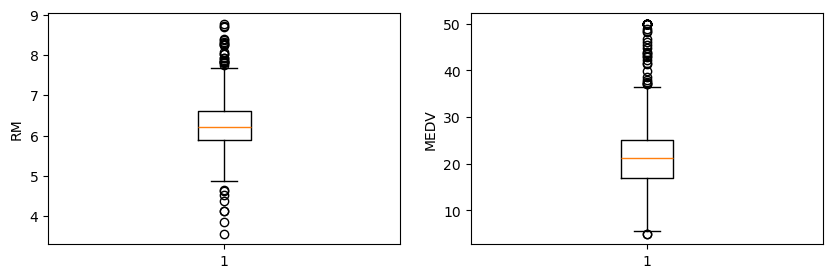

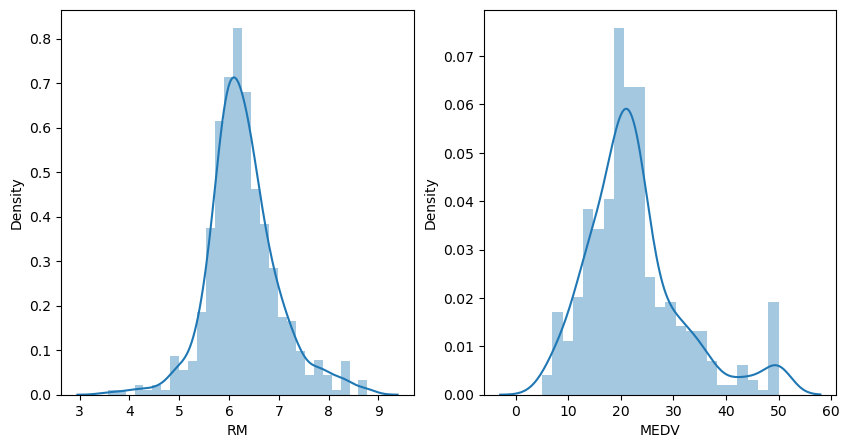

In [11]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

RM = df_boston['RM']
MEDV = df_boston['MEDV']

print("RM skew: ", RM.skew())
print("MEDV skew: ", MEDV.skew())
plt.figure(2, figsize=(10,3))
plt.subplot(1,2,1)
plt.boxplot(RM)
plt.ylabel('RM')
plt.subplot(1,2,2)
plt.boxplot(MEDV)
plt.ylabel('MEDV')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(RM)

plt.subplot(1,2,2)
sns.distplot(MEDV)

##### We can see a normal distribution in RM but not for MEDV

In [12]:
#Lets apply percentile method to RM
upper_limit = RM.quantile(0.99)
lower_limit = RM.quantile(0.01)
print('lower limit: ', lower_limit)
print('upper limit: ', upper_limit)

# Using clip to trim
RM_new = RM.clip(lower=lower_limit, upper=upper_limit)

lower limit:  4.52445
upper limit:  8.334999999999999


In [16]:
# Lets apply IQR to MEDV
Q1 = MEDV.quantile(0.25)
Q3 = MEDV.quantile(0.75)

IQR = Q3-Q1

# Not using 1.5  to exclude the outliers better
MEDV_upper_limit = Q3+1.3*IQR
MEDV_lower_limit = Q1-1.8*IQR

print('lower limit: ', MEDV_lower_limit)
print('upper limit: ', MEDV_upper_limit)
print('IQR:' , IQR)

# trimming again
MEDV_new = MEDV.clip(lower=MEDV_upper_limit, upper=MEDV_lower_limit)

lower limit:  2.6699999999999964
upper limit:  35.3675
IQR: 7.975000000000001


<Axes: xlabel='MEDV', ylabel='Density'>

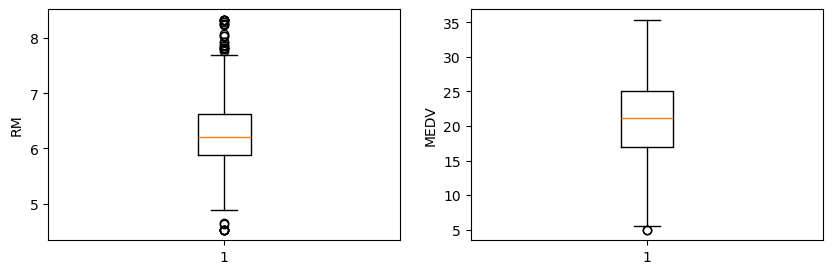

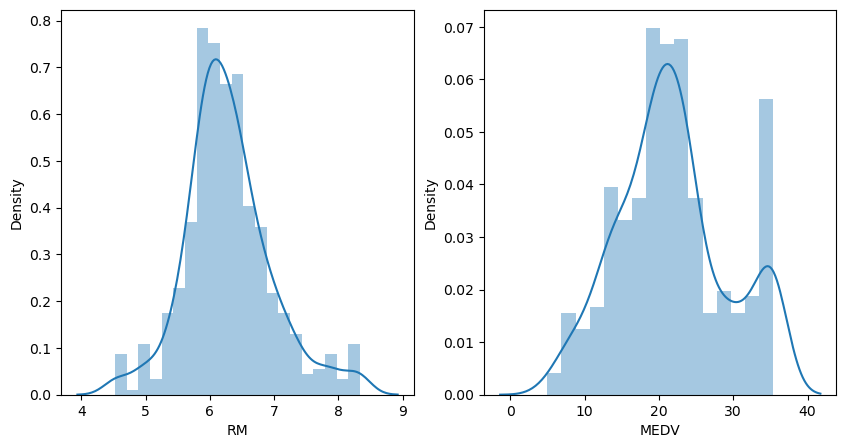

In [17]:
plt.figure(2, figsize=(10,3))
plt.subplot(1,2,1)
plt.boxplot(RM_new)
plt.ylabel('RM')
plt.subplot(1,2,2)
plt.boxplot(MEDV_new)
plt.ylabel('MEDV')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(RM_new)

plt.subplot(1,2,2)
sns.distplot(MEDV_new)

In [19]:
# Im not ure why the boxplot for RM is showing outliers, I printed here values above and under the limits to check
print("RM values under lower_limit: ", len(RM_new[RM_new < lower_limit]))
print("RM values above upper_limit", len(RM_new[RM_new > upper_limit]))
print("MEDV values under lower_limit: ", len(MEDV_new[MEDV_new < MEDV_lower_limit]))
print("MEDV values above upper_limit", len(MEDV_new[MEDV_new > MEDV_upper_limit]))

RM values under lower_limit:  0
RM values above upper_limit 0
MEDV values under lower_limit:  0
MEDV values above upper_limit 0
